In [1]:
# Importing necessary libraries/packages : : 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
# DATA EXTRACTION AND EXPLORATION
d=pd.read_csv("IRIS.csv")

In [3]:
# checking dataset columns
d.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
d.shape

(150, 5)

In [5]:
d.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## UNIVARIATE ANALYSIS OF VARIABLES (COLUMNS)

In [7]:
d.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
d['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
d['species'].value_counts(normalize=True)   # To see proportions instead of numbers

species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

<Axes: xlabel='species'>

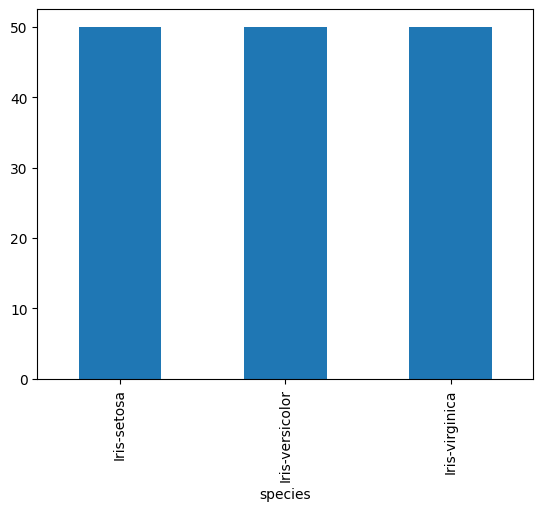

In [10]:
# Bar Plot for species
d['species'].value_counts().plot.bar()

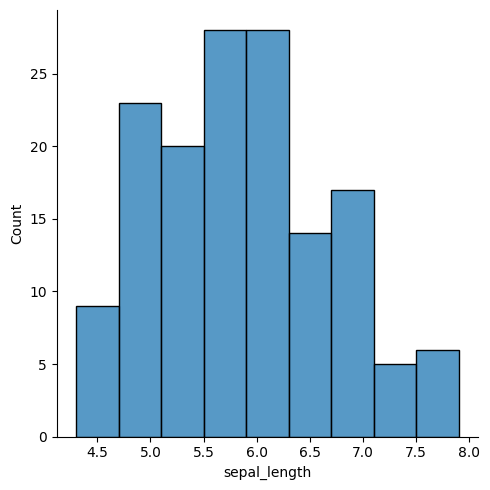

In [11]:
#Distribution plot for 'sepal_length'

sn.displot(d['sepal_length'])

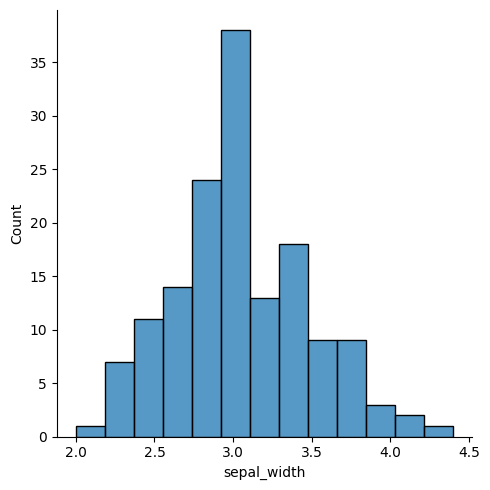

In [12]:
sn.displot(d['sepal_width'])

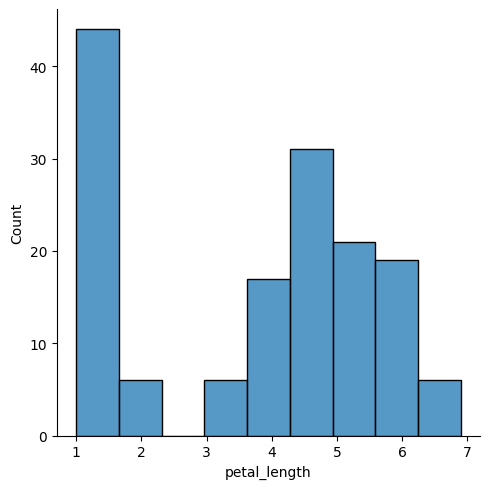

In [13]:
sn.displot(d['petal_length'])

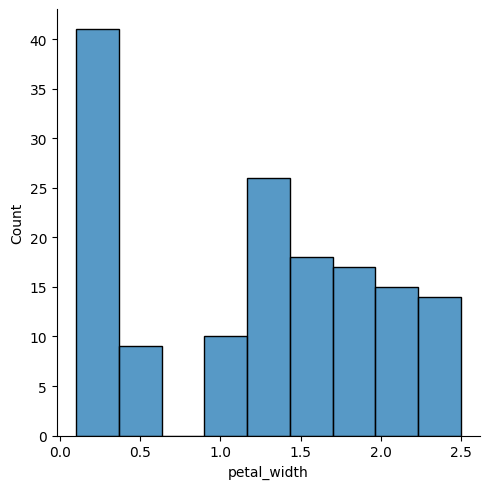

In [14]:
sn.displot(d['petal_width'])

## BI-VARIATE ANALYSIS

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

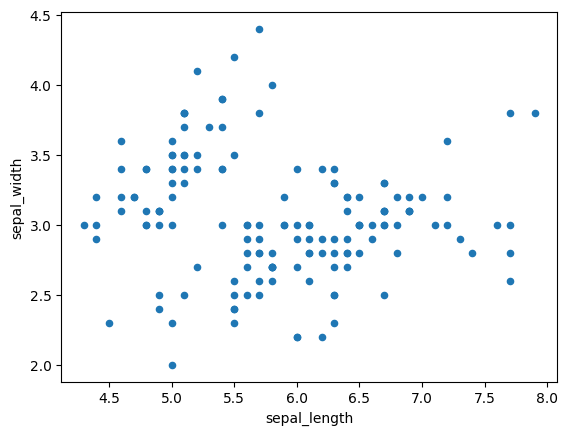

In [15]:
# Scatter Plot between Sepal length and width
d.plot.scatter('sepal_length','sepal_width')

<Axes: xlabel='petal_length', ylabel='petal_width'>

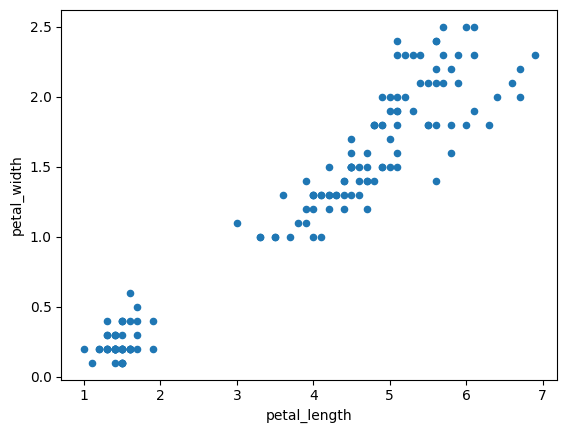

In [16]:
# Scatter Plot between Petal length and width
d.plot.scatter('petal_length','petal_width')

In [17]:
d.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

In [18]:
# Fix for the FutureWarning
d = d.infer_objects()


<Axes: >

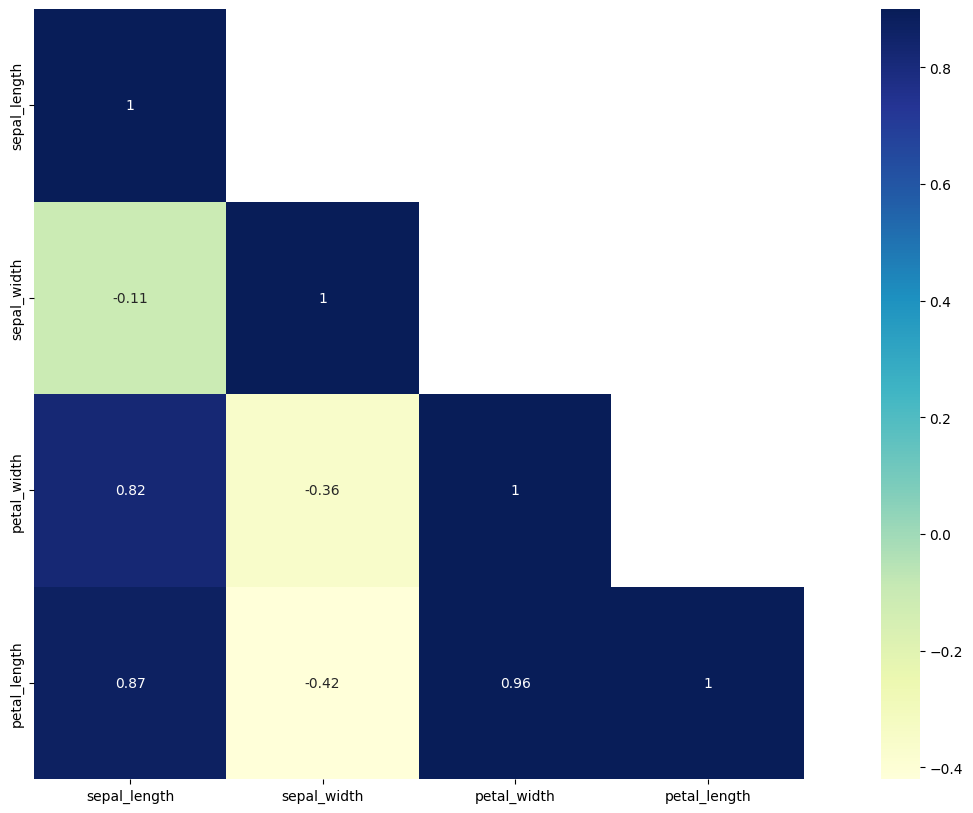

In [19]:
corr = d[['sepal_length','sepal_width','petal_width','petal_length']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [20]:
# Check for missing values
print(d.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


<Axes: >

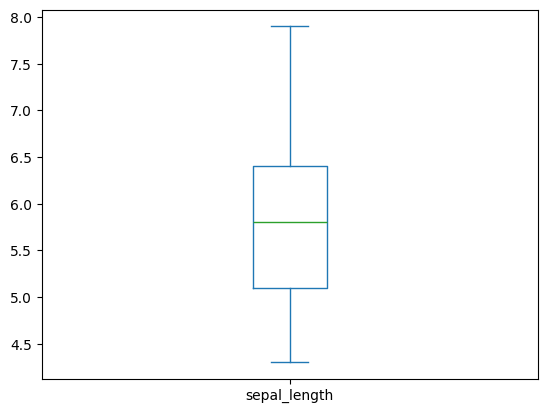

In [21]:
d['sepal_length'].plot.box()

<Axes: >

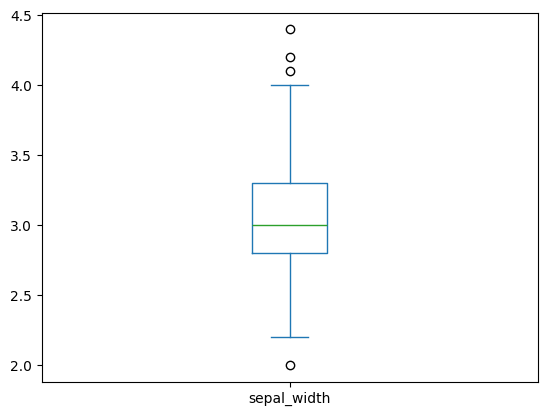

In [22]:
d['sepal_width'].plot.box()

In [23]:
#outlier detected in SepalWidth : treatement :
d=d[(d['sepal_width']>=2.5) & (d['sepal_width']<=4)]

<Axes: >

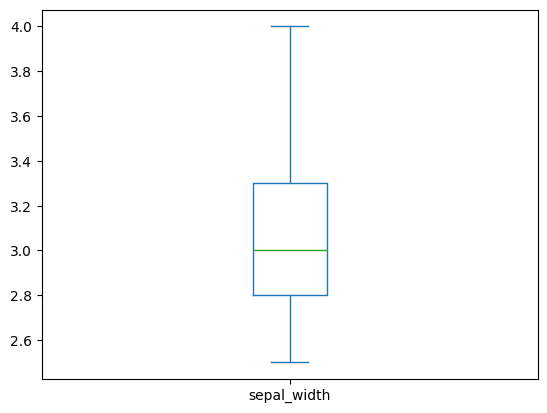

In [24]:
d['sepal_width'].plot.box()

<Axes: >

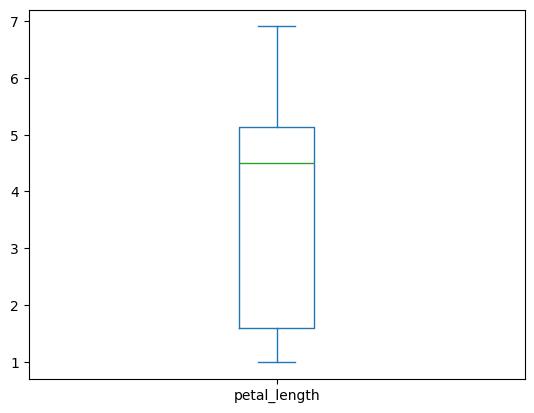

In [25]:
d['petal_length'].plot.box()

<Axes: >

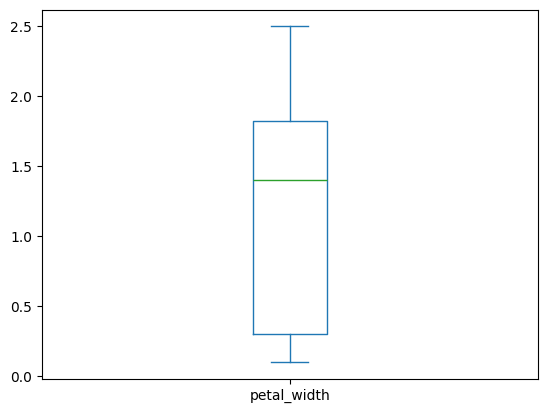

In [26]:
d['petal_width'].plot.box()

MODEL BUILDING

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
l = LabelEncoder()
d['species'] = l.fit_transform(d['species'])  #l-Label encoder object

In [29]:
X = d.drop([ 'species'], axis=1)          #feature variables
y = d['species']                               #target variable


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [31]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = lreg.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy*100,"%")

Logistic Regression Accuracy: 96.42857142857143 %


## DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc=DecisionTreeClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,stratify=y)

In [37]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
pred=dtc.predict(X_test)

In [39]:
accuracy=accuracy_score(y_test,pred)

In [40]:
print("Accuracy by Decision Tree on test data : ",accuracy*100," %")

Accuracy by Decision Tree on test data :  94.11764705882352  %
